In [1]:
#!/usr/bin/python
#-*- coding: <utf-8 -*-

# Import all packages and authentification details

# packages lists
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
import tweepy
import pandas as pd
import numpy as np
import time
import pprint
import json
import matplotlib 
import matplotlib.pyplot as plt
import seaborn
from config import (consumer_key, consumer_secret,
                    access_token, access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [2]:
# Target User Account

target_users = [ "BBCNews",
"CBSNews",
"CNN",
"FoxNews",
"nytimes"]

In [3]:
# THIS CELL WILL GRAB THE "", "", AND "" VALUES AND PUT THEM INTO THE LISTS MADE IN THE PREVIOUS CELL 

#pretty print
pp = pprint.PrettyPrinter(indent=4)

#create the dictionary that we will put our columns (as lists) in
counter = 0 

tweet_data = {"twt_source": [],
             "twt_text": [],
             "twt_date": [],
             "twt_vader": [],
             "twt_neg":  [],
             "twt_pos": [],
              "twt_neu": [],
            "twt_counter": []}

#second for loop, basically will loop through the different news sources
for users in target_users:
    
    
    # Loop through 5 pages of tweets (total 100 tweets per target user)
    for x in range(0, 5):
        public_tweets = api.user_timeline(users, page=x)
        
        #another for loop
        for tweet in public_tweets:
            tweet_data["twt_source"].append(tweet["user"]["name"])  
            tweet_data["twt_text"].append(tweet["text"])            
            tweet_data["twt_date"].append(tweet["created_at"])  
            tweet_data["twt_counter"].append(counter)
                
            tweet_data["twt_vader"].append(analyzer.polarity_scores(tweet_data["twt_text"][counter])["compound"])
            tweet_data["twt_neg"].append(analyzer.polarity_scores(tweet_data["twt_text"][counter])["neg"])
            tweet_data["twt_pos"].append(analyzer.polarity_scores(tweet_data["twt_text"][counter])["pos"])
            tweet_data["twt_neu"].append(analyzer.polarity_scores(tweet_data["twt_text"][counter])["neu"])
            counter = counter + 1
            
            #pp.pprint(tweet)
            #print(tweet_data["twt_text"][0])
            # Run analysis
            # test = analyzer.polarity_scores(tweet_data["twt_text"][0])["neu"]
            # print(test)
            
            #pp.pprint(tweet_data["twt_text"])

In [4]:
# plot the first 

# put the dictionary into a data frame
tweet_data_df = pd.DataFrame.from_dict(tweet_data)
tweet_data_df["twt_source"].unique()

tweet_data_df.head()

twt_source                                           twt_text  \
0  BBC News (UK)  Royal Mail criticised for D-Day stamp mix-up h...   
1  BBC News (UK)  National archives: When Margaret Thatcher met ...   
2  BBC News (UK)  Dame Vera Lynn threatened to pull out of D-Day...   
3  BBC News (UK)  What awaits any Rohingya refugees who return t...   
4  BBC News (UK)  New York awe-struck as sky over Queens turns b...   

                         twt_date  twt_vader  twt_neg  twt_pos  twt_neu  \
0  Fri Dec 28 06:08:18 +0000 2018    -0.4215    0.286    0.000    0.714   
1  Fri Dec 28 06:01:19 +0000 2018     0.0000    0.000    0.000    1.000   
2  Fri Dec 28 05:51:54 +0000 2018    -0.4588    0.200    0.000    0.800   
3  Fri Dec 28 05:40:16 +0000 2018     0.0772    0.000    0.126    0.874   
4  Fri Dec 28 05:21:25 +0000 2018     0.0000    0.000    0.000    1.000   

   twt_counter  
0            0  
1            1  
2            2  
3            3  
4            4

In [5]:
#OK - now that I have the plot looking kind of like how I want it - I 
# want to have the actual tweets ago column.  I'll make it from the twt_
# counter column
tweet_data_df['tweets_ago'] = abs(tweet_data_df['twt_counter'] - 100)
tweet_data_df

twt_source                                           twt_text  \
0         BBC News (UK)  Royal Mail criticised for D-Day stamp mix-up h...   
1         BBC News (UK)  National archives: When Margaret Thatcher met ...   
2         BBC News (UK)  Dame Vera Lynn threatened to pull out of D-Day...   
3         BBC News (UK)  What awaits any Rohingya refugees who return t...   
4         BBC News (UK)  New York awe-struck as sky over Queens turns b...   
5         BBC News (UK)  The Skripals and the Salisbury poisoning: What...   
6         BBC News (UK)  The simple tips to improve your health https:/...   
7         BBC News (UK)  The booming trade in second-hand books https:/...   
8         BBC News (UK)  Hassan al-Kontar: Inside the story of his resc...   
9         BBC News (UK)  Tuition fees heading down in 2019? https://t.c...   
10        BBC News (UK)  Cold Feet: Learning from 'mistakes' of last se...   
11        BBC News (UK)  How can the UK avoid another year of knife cri...   
12        BBC News (UK)  More than half a million potholes reported las...   
13        BBC News (UK)  Film 2019 will never be, as BBC drops long-run...   
14        BBC News (UK)  Maidstone murder charge after woman found dead...   
15        BBC News (UK)  US shutdown impasse over Trump's wall drags on...   
16        BBC News (UK)  'Why the time is right for Brexit origins stor...   
17        BBC News (UK)  Newspaper headlines: Iceland crash and migrant...   
18        BBC News (UK)  Caerphilly family's presents stolen on Christm...   
19        BBC News (UK)  More than 20 migrants detained in Kent https:/...   
20        BBC News (UK)  Royal Mail criticised for D-Day stamp mix-up h...   
21        BBC News (UK)  National archives: When Margaret Thatcher met ...   
22        BBC News (UK)  Dame Vera Lynn threatened to pull out of D-Day...   
23        BBC News (UK)  What awaits any Rohingya refugees who return t...   
24        BBC News (UK)  New York awe-struck as sky over Queens turns b...   
25        BBC News (UK)  The Skripals and the Salisbury poisoning: What...   
26        BBC News (UK)  The simple tips to improve your health https:/...   
27        BBC News (UK)  The booming trade in second-hand books https:/...   
28        BBC News (UK)  Hassan al-Kontar: Inside the story of his resc...   
29        BBC News (UK)  Tuition fees heading down in 2019? https://t.c...   
..                  ...                                                ...   
470  The New York Times  Last December, the price of Bitcoin was $19,78...   
471  The New York Times  A 71-year-old Frenchman is attempting to cross...   
472  The New York Times  The internet can be, shall we say, a lot. But ...   
473  The New York Times  Indian rescue workers are struggling to save 1...   
474  The New York Times  The Trump administration and Republicans in Co...   
475  The New York Times  Before we announce our new traveler for 52 Pla...   
476  The New York Times  Some of Bernie Sanders's top congressional sup...   
477  The New York Times  Instagram briefly changed how users scroll thr...   
478  The New York Times  From ballet in Rio de Janeiro to a town confro...   
479  The New York Times  How #MeToo changes ‘If Beale Street Could Talk...   
480  The New York Times  36 Hours in Bogotá: a gallery scene that celeb...   
481  The New York Times  "I just think of the false impression it gave ...   
482  The New York Times  Linda Biggs's home narrowly survived the Camp ...   
483  The New York Times  6 ways to be an effective parent in 2019 https...   
484  The New York Times  Since President Trump took office, his adminis...   
485  The New York Times  "My tattoos are a part of my persona and ident...   
486  The New York Times  "We're all kind of waiting to see how we go fo...   
487  The New York Times  The tech billionaire Reid Hoffman said he was ...   
488  The New York Times  Breaking News: U.S. stocks fell and Wall Stree...   
489  The New York Times  "We're no 

In [6]:
# plotting the scatter plot
# first I want to have the column header names (to identify x, y)
### list(tweet_data_df)
# now let's make new dataframes based upon the tweet source
bbc = tweet_data_df['twt_source'] == "BBC News (UK)"
cbs = tweet_data_df['twt_source'] == "CBS News"
cnn = tweet_data_df['twt_source'] == "CNN"
fox = tweet_data_df['twt_source'] == "Fox News"
nyt = tweet_data_df['twt_source'] == "The New York Times"
#tweet_data_df[nyt]


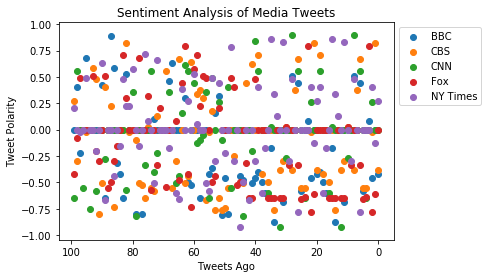

In [32]:
### Now I can try and define the one X and multiple Y axis
### based on the new dataframes

# x axes
x_bbc = tweet_data_df[bbc].twt_counter
x_cbs = tweet_data_df[cbs].twt_counter - 100
x_cnn = tweet_data_df[cnn].twt_counter - 200
x_fox = tweet_data_df[fox].twt_counter - 300
x_nyt = tweet_data_df[nyt].twt_counter - 400

# y axes
y_bbc = tweet_data_df[bbc].twt_vader
y_cbs = tweet_data_df[cbs].twt_vader
y_cnn = tweet_data_df[cnn].twt_vader
y_fox = tweet_data_df[fox].twt_vader
y_nyt = tweet_data_df[nyt].twt_vader
    
# now overwrite the default x-label
plt.scatter(x_bbc, y_bbc, label = "BBC")
plt.scatter(x_cbs, y_cbs, label = "CBS")
plt.scatter(x_cnn, y_cnn, label = "CNN")
plt.scatter(x_fox, y_fox, label = "Fox")
plt.scatter(x_nyt, y_nyt, label = "NY Times")
plt.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.title(f"Sentiment Analysis of Media Tweets")
plt.xlim([x_bbc.max()+5, x_bbc.min()-5])
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")

plt.show()

Text(0,0.5,'Tweet Polarity')

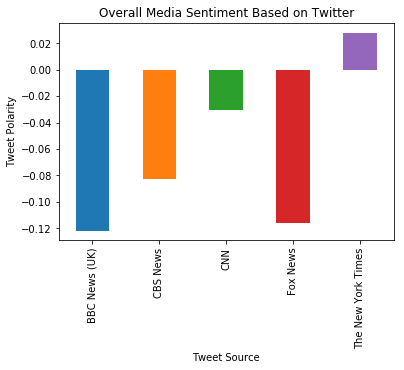

In [50]:
# second plot
second_one = tweet_data_df.groupby(["twt_source"]).mean()["twt_vader"]
second_one.plot.bar()

plt.title(f"Overall Media Sentiment Based on Twitter")
plt.xlabel("Tweet Source")
plt.ylabel("Tweet Polarity")

